# Map the 2019 Novel Coronavirus Globally

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Import-Data" data-toc-modified-id="1.-Import-Data-1">1. Import Data</a></span><ul class="toc-item"><li><span><a href="#Necessary-Imports" data-toc-modified-id="Necessary-Imports-1.1">Necessary Imports</a></span></li><li><span><a href="#Query-the-source-feature-layer" data-toc-modified-id="Query-the-source-feature-layer-1.2">Query the source feature layer</a></span></li><li><span><a href="#Split-DataFrame-into-subsets-per-administrative-unit" data-toc-modified-id="Split-DataFrame-into-subsets-per-administrative-unit-1.3">Split DataFrame into subsets per administrative unit</a></span></li></ul></li><li><span><a href="#2.-Map-the-COVID-19-cases-in-China" data-toc-modified-id="2.-Map-the-COVID-19-cases-in-China-2">2. Map the COVID-19 cases in China</a></span><ul class="toc-item"><li><span><a href="#Access-Feature-Service-and-Merge" data-toc-modified-id="Access-Feature-Service-and-Merge-2.1">Access Feature Service and Merge</a></span></li><li><span><a href="#Map-the-confirmed-COVID-19-cases" data-toc-modified-id="Map-the-confirmed-COVID-19-cases-2.2">Map the confirmed COVID-19 cases</a></span><ul class="toc-item"><li><span><a href="#Display-as-points" data-toc-modified-id="Display-as-points-2.2.1">Display as points</a></span></li><li><span><a href="#Display-as-polygons" data-toc-modified-id="Display-as-polygons-2.2.2">Display as polygons</a></span></li></ul></li><li><span><a href="#Map-the-deaths-caused-by-COVID-19" data-toc-modified-id="Map-the-deaths-caused-by-COVID-19-2.3">Map the deaths caused by COVID-19</a></span><ul class="toc-item"><li><span><a href="#Display-as-points" data-toc-modified-id="Display-as-points-2.3.1">Display as points</a></span></li><li><span><a href="#Display-as-polygons" data-toc-modified-id="Display-as-polygons-2.3.2">Display as polygons</a></span></li></ul></li><li><span><a href="#Map-the-recovered-COVID-19-cases" data-toc-modified-id="Map-the-recovered-COVID-19-cases-2.4">Map the recovered COVID-19 cases</a></span><ul class="toc-item"><li><span><a href="#Display-as-points" data-toc-modified-id="Display-as-points-2.4.1">Display as points</a></span></li><li><span><a href="#Display-as-polygons" data-toc-modified-id="Display-as-polygons-2.4.2">Display as polygons</a></span></li></ul></li></ul></li><li><span><a href="#3.-Map-the-COVID-19-cases-In-the-U.S." data-toc-modified-id="3.-Map-the-COVID-19-cases-In-the-U.S.-3">3. Map the COVID-19 cases In the U.S.</a></span><ul class="toc-item"><li><span><a href="#Access-feature-service,-and-merge" data-toc-modified-id="Access-feature-service,-and-merge-3.1">Access feature service, and merge</a></span></li><li><span><a href="#Map-the-confirmed-COVID-19-cases-in-U.-S." data-toc-modified-id="Map-the-confirmed-COVID-19-cases-in-U.-S.-3.2">Map the confirmed COVID-19 cases in U. S.</a></span></li><li><span><a href="#Map-the-COVID-19-deaths-in-U.-S." data-toc-modified-id="Map-the-COVID-19-deaths-in-U.-S.-3.3">Map the COVID-19 deaths in U. S.</a></span></li></ul></li><li><span><a href="#4.-Map-the-COVID-19-cases-in-other-countries-or-regions" data-toc-modified-id="4.-Map-the-COVID-19-cases-in-other-countries-or-regions-4">4. Map the COVID-19 cases in other countries or regions</a></span><ul class="toc-item"><li><span><a href="#Access-Feature-Service-and-merge" data-toc-modified-id="Access-Feature-Service-and-merge-4.1">Access Feature Service and merge</a></span></li><li><span><a href="#Map-the-confirmed-COVID-19-cases-in-other-countries-or-regions" data-toc-modified-id="Map-the-confirmed-COVID-19-cases-in-other-countries-or-regions-4.2">Map the confirmed COVID-19 cases in other countries or regions</a></span></li></ul></li><li><span><a href="#5.-What's-next?" data-toc-modified-id="5.-What's-next?-5">5. What's next?</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6">References</a></span></li></ul></div>

According to <a href="https://www.who.int/emergencies/diseases/novel-coronavirus-2019">WHO</a>, 2019 Novel Corona Virus (**COVID-19**) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness, which was unknown before the outbreak began in Wuhan, China, in December 2019. Early on the disease suggested an animal-to-person spread, then a person-to-person spread is occurring. Infections with COVID-19, are being reported in a growing number of international locations, including the United States. The United States reported the first confirmed instance of person-to-person spread with this virus on January 30, 2020.

This notebook is to guide you through the steps in mapping and monitoring the situations of the COVID-19 across the globe, with ArcGIS API for Python.

## 1. Import Data

Esri provides an open-to-public and free-to-share <a href="https://coronavirus-disasterresponse.hub.arcgis.com/datasets/bbb2e4f589ba40d692fab712ae37b9ac">feature layer</a> that contains the most up-to-date COVID-19 cases covering China, the United States, Canada, Australia (at province/state level), and the rest of the world (at country level, represented by either the country centroids or their capitals). Data sources are WHO, US CDC, China NHC, ECDC, and DXY. The China data is automatically updating at least once per hour, and non-China data is updating manually. The data source repo that this layer referenced from, is created and maintained by the Center for Systems Science and Engineering (CSSE) at the Johns Hopkins University, and can be viewed <a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6">here</a>. In this notebook, we will use the feature layer supported by Esri Living Atlas team and JHU Data Services, and provide a different perspective in viewing the global maps of COVID-19 via the use of ArcGIS API for Python.

### Necessary Imports

In [1]:
from io import BytesIO
import requests
import pandas as pd
from arcgis.features import FeatureLayer
from arcgis.gis import GIS

In [2]:
"""
# if you are using arcgis api for python with version 1.8.0 or above,
# make sure that the pandas version>=1.0,
# if not, use `pip install --upgrade pandas>=1` to upgrade.
"""
pd.__version__

'1.0.3'

### Query the source feature layer

In [3]:
src_url = "https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1"
fl = FeatureLayer(url=src_url)

In [4]:
df_global = fl.query(where="1=1",
                     return_geometry=True,
                     as_df=True)

As stated in the JHU dashboard, the source data can be grouped into:
  - A. Countries or regions of which data are collected at province/state level, e.g. China, the United States, Canada, Australia; 
  - B. Countries or regions for the rest of the world of which data collected at country level, and shape represented by either the country centroids or their capitals;
  - C. Cruise Ships with confirmed COVID-19 cases.
  
Let us first take a look at how many countries are within group A, that `Country_Region` and `Province_State` are not null or NAN.

In [5]:
df_global[~pd.isnull(df_global['Province_State'])].groupby('Country_Region').sum()[['Confirmed', 'Recovered', 'Deaths']]

Confirmed  Recovered  Deaths
Country_Region                              
Australia            6765       5747      93
Canada              55932      22516    3499
China               83958      78567    4637
Denmark               198        195       0
France               1539        912      34
Netherlands           197        138      16
US                1098565     164015   64577
United Kingdom       1230        892      73

In [6]:
df_global.loc[df_global['Country_Region']=='US', 'Country_Region'] = 'United States'
df_global.loc[df_global['Country_Region']=='Korea, South', 'Country_Region'] = 'South Korea'
df_global.loc[df_global['Country_Region']=='Korea, North', 'Country_Region'] = 'North Korea'
df_global.loc[df_global['Country_Region']=='Russia', 'Country_Region'] = 'Russian Federation'
df_global.loc[df_global['Country_Region']=='Czechia', 'Country_Region'] = 'Czech Republic'

In [7]:
# sorted by # of confirmed cases
df_global_sum = df_global.groupby('Country_Region').sum()[['Confirmed', 'Recovered', 'Deaths']]
df_global_sum_c = df_global_sum.sort_values(by = ['Confirmed'], ascending = False)
df_global_sum_c.head(10)

Confirmed  Recovered  Deaths
Country_Region                                  
United States         1098565     164015   64577
Spain                  213435     112050   24543
Italy                  207428      78249   28236
United Kingdom         178684        892   27583
France                 167303      51124   24628
Germany                163936     126900    6708
Turkey                 122392      53808    3258
Russian Federation     114431      13220    1169
Iran                    95646      76318    6091
Brazil                  91589      38039    6329

In [8]:
# sorted by death tolls
df_global_sum_d = df_global_sum.sort_values(by = ['Deaths'], ascending = False)
df_global_sum_d.head(10)

Confirmed  Recovered  Deaths
Country_Region                              
United States     1098565     164015   64577
Italy              207428      78249   28236
United Kingdom     178684        892   27583
France             167303      51124   24628
Spain              213435     112050   24543
Belgium             49032      11892    7703
Germany            163936     126900    6708
Brazil              91589      38039    6329
Iran                95646      76318    6091
Netherlands         39988        138    4909

In [9]:
fset_usa = fl.query(where="Country_Region='US'")
fset_usa

<FeatureSet> 60 features

In [10]:
fset_china = fl.query(where="Country_Region='China'")
fset_china

<FeatureSet> 33 features

In [13]:
fset_cruise_ships = fl.query(where="Province_State='Diamond Princess' or \
                                    Province_State='Grand Princess' or \
                                    Country_Region='MS Zaandam' or \
                                    Country_Region='Diamond Princess'")

In [12]:
fset_cruise_ships.sdf[["Province_State", "Country_Region", "Last_Update", "Confirmed", "Recovered", "Deaths"]]

Province_State    Country_Region         Last_Update  Confirmed  \
0  Diamond Princess            Canada 2020-05-01 22:32:33          0   
1    Grand Princess            Canada 2020-05-01 22:32:33         13   
2              None  Diamond Princess 2020-05-01 22:32:33        712   
3              None        MS Zaandam 2020-05-01 22:32:33          9   
4    Grand Princess                US 2020-05-01 22:32:33        103   
5  Diamond Princess                US 2020-05-01 22:32:33         49   

   Recovered  Deaths  
0          0       1  
1          0       0  
2        645      13  
3          0       2  
4          0       3  
5          0       0

### Split DataFrame into subsets per administrative unit

Next, we will split the entire DataFrame `df` that is being created from the Google Sheet into small subsets for visualization purposes. Note that, a new column `NAME` is created to be used as a common key for merging operations to be performed in the following section.

We are to split the original DataFrame into four subsets based on the administrative units:
  1. for Mainland China, number of cases are reported per province; 
  2. for most of the regions and countries outside of Mainland China, number of cases are summarized per region/country (e.g. we are seeing Belgium as a country/region being reported here); 
  3. for cities/counties with significant number of cases outside of Mainland China, number of cases are reported per single city or county (e.g. Madison, WI in the U.S. is listed individually here); 
  4. the last record in the DataFrame lists Cruise Ship since the Diamond Princess cruise ship itself contains a considerable amount of confirmed cases.

In [5]:
df1 = df[df["Country/Region"].isin(["Mainland China", "Taiwan", "Hong Kong", "Macau"])]
df1 = df1.assign(NAME = df1["Province/State"])
df1.head()

Province/State  Country/Region         Last Update  Confirmed  Deaths  \
0          Hubei  Mainland China 2020-02-09 23:33:00      29631     871   
1      Guangdong  Mainland China 2020-02-10 03:43:00       1151       1   
2       Zhejiang  Mainland China 2020-02-10 01:13:00       1092       0   
3          Henan  Mainland China 2020-02-10 01:13:00       1073       6   
4          Hunan  Mainland China 2020-02-10 02:13:00        879       1   

   Recovered       NAME  
0       1795      Hubei  
1        147  Guangdong  
2        201   Zhejiang  
3        169      Henan  
4        186      Hunan

Because there are some inconsistencies in the naming of some provinces, the `replace_value_in_column` function is defined to replace the original name value `l_value` with a new value `r_value`.

In [6]:
def replace_value_in_column(data_frame, l_value, r_value, column_name = 'NAME'):
    data_frame.loc[data_frame[column_name] == l_value, column_name] = r_value
    display(data_frame[data_frame[column_name] == r_value])

In [7]:
replace_value_in_column(df1, 'Guangxi', 'Guangxi Zhuang Autonomous Region')

Province/State  Country/Region         Last Update  Confirmed  Deaths  \
17        Guangxi  Mainland China 2020-02-10 02:03:00        210       1   

    Recovered                              NAME  
17         18  Guangxi Zhuang Autonomous Region

In [8]:
replace_value_in_column(df1, 'Inner Mongolia', 'Inner Mongolia Autonomous Region')

Province/State  Country/Region         Last Update  Confirmed  Deaths  \
27  Inner Mongolia  Mainland China 2020-02-10 02:43:00         58       0   

    Recovered                              NAME  
27          5  Inner Mongolia Autonomous Region

In [9]:
replace_value_in_column(df1, 'Ningxia', 'Ningxia Hui Autonomous Region')

Province/State  Country/Region         Last Update  Confirmed  Deaths  \
28        Ningxia  Mainland China 2020-02-10 01:43:00         49       0   

    Recovered                           NAME  
28         13  Ningxia Hui Autonomous Region

In [10]:
replace_value_in_column(df1, 'Tibet', 'Tibet Autonomous Region')

Province/State  Country/Region         Last Update  Confirmed  Deaths  \
62          Tibet  Mainland China 2020-02-01 01:52:00          1       0   

    Recovered                     NAME  
62          0  Tibet Autonomous Region

Apart from `df1` being extracted as the first subset, we can also create two other subsets from `df` to represent scenarios 2 and 3:
  - `df3`: countries/regions with at least 1 confirmed COVID-19 case, and 
  - `df2`: cities in countries/regions outside of China that are listed with at least 1 confirmed COVID-19 case.

In [33]:
df_foreign_areas = df
cond = df_foreign_areas["Province/State"].isin(df1["Province/State"]) == True
df_foreign_areas.drop(df_foreign_areas[cond].index, inplace = True)
df_foreign_areas.head()

NameError: name 'df' is not defined

In [12]:
df2 = df_foreign_areas[df_foreign_areas["Province/State"].notnull()]
df2.head()

Province/State Country/Region         Last Update  \
26  Diamond Princess cruise ship         Others 2020-02-09 06:13:00   
43                    Queensland      Australia 2020-02-09 19:33:00   
44               New South Wales      Australia 2020-02-06 03:13:00   
45                      Victoria      Australia 2020-02-01 18:12:00   
46              British Columbia         Canada 2020-02-07 05:43:00   

    Confirmed  Deaths  Recovered  
26         64       0          0  
43          5       0          0  
44          4       0          2  
45          4       0          0  
46          4       0          0

In [13]:
df2 = df2.assign(name = df2["Province/State"])
df2.head()

Province/State Country/Region         Last Update  \
26  Diamond Princess cruise ship         Others 2020-02-09 06:13:00   
43                    Queensland      Australia 2020-02-09 19:33:00   
44               New South Wales      Australia 2020-02-06 03:13:00   
45                      Victoria      Australia 2020-02-01 18:12:00   
46              British Columbia         Canada 2020-02-07 05:43:00   

    Confirmed  Deaths  Recovered                          name  
26         64       0          0  Diamond Princess cruise ship  
43          5       0          0                    Queensland  
44          4       0          2               New South Wales  
45          4       0          0                      Victoria  
46          4       0          0              British Columbia

In [14]:
df3 = df_foreign_areas[df_foreign_areas["Province/State"].isnull()]
df3.head()

Province/State Country/Region         Last Update  Confirmed  Deaths  \
30            NaN      Singapore 2020-02-10 03:03:00         43       0   
32            NaN       Thailand 2020-02-08 12:53:00         32       0   
33            NaN    South Korea 2020-02-10 03:03:00         27       0   
34            NaN          Japan 2020-02-09 06:13:00         26       0   
36            NaN       Malaysia 2020-02-10 03:03:00         18       0   

    Recovered  
30          2  
32         10  
33          3  
34          1  
36          1

In [15]:
df3 = df3.assign(Country = df3['Country/Region'])
df3.head()

Province/State Country/Region         Last Update  Confirmed  Deaths  \
30            NaN      Singapore 2020-02-10 03:03:00         43       0   
32            NaN       Thailand 2020-02-08 12:53:00         32       0   
33            NaN    South Korea 2020-02-10 03:03:00         27       0   
34            NaN          Japan 2020-02-09 06:13:00         26       0   
36            NaN       Malaysia 2020-02-10 03:03:00         18       0   

    Recovered      Country  
30          2    Singapore  
32         10     Thailand  
33          3  South Korea  
34          1        Japan  
36          1     Malaysia

## 2. Map the COVID-19 cases in China

The subsets of dataframe being created in the previous section would need to be merged with feature services which have geographic information (e.g. geometries, shape, or longitude/latitude) in order to provide locaton and geometries for mapping. First, let's acquire the geometries from feature services existing on living atlas to represent the geographic information needed of `df1`.

### Access Feature Service and Merge

In [14]:
gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

In [15]:
provinces_item = gis.content.get('461458d41e7b422e885fb8cc3ab361ab')

In [16]:
provinces_flayer = provinces_item.layers[0]
provinces_fset = provinces_flayer.query()
provinces_fset.sdf.columns

Index(['OBJECTID', 'ID', 'NAME', 'AREA', 'TOTPOP_CY', 'ISO_CODE', 'ISO_SUB',
       'ISO2_CC', 'ISO3_CC', 'Shape__Area', 'Shape__Length', 'ID_1',
       'sourceCountry', 'ENRICH_FID', 'aggregationMethod',
       'populationToPolygonSizeRating', 'apportionmentConfidence', 'HasData',
       'TOTPOP_CY_1', 'SHAPE'],
      dtype='object')

In [17]:
df1 = fset_china.sdf[['Province_State', 'Confirmed', 'Recovered', 'Deaths']]
df1 = df1.assign(NAME = df1["Province_State"])
df1.head()

Province_State  Confirmed  Recovered  Deaths       NAME
0          Anhui        991        985       6      Anhui
1        Beijing        593        547       9    Beijing
2      Chongqing        579        573       6  Chongqing
3         Fujian        356        353       1     Fujian
4          Gansu        139        137       2      Gansu

In [18]:
def replace_value_in_column(data_frame, l_value, r_value, column_name = 'NAME'):
    data_frame.loc[data_frame[column_name] == l_value, column_name] = r_value

replace_value_in_column(df1, 'Guangxi', 'Guangxi Zhuang Autonomous Region')
replace_value_in_column(df1, 'Inner Mongolia', 'Inner Mongolia Autonomous Region')
replace_value_in_column(df1, 'Ningxia', 'Ningxia Hui Autonomous Region')
replace_value_in_column(df1, 'Tibet', 'Tibet Autonomous Region')

In [19]:
cols_2 = ['NAME', 'AREA', 'TOTPOP_CY','SHAPE','Shape__Area', 'Shape__Length']
overlap_rows = pd.merge(left = provinces_fset.sdf[cols_2], right = df1, how='inner',
                        on = 'NAME')
overlap_rows.head(3)

NAME           AREA  TOTPOP_CY  \
0  Beijing   16535.530210   21933363   
1  Tianjin   11623.865583   15535310   
2    Hebei  187381.031183   74961654   

                                               SHAPE  Shape__Area  \
0  {'rings': [[[116.817586898717, 39.614297867152...     1.748578   
1  {'rings': [[[117.385320663218, 40.226179123367...     1.213896   
2  {'rings': [[[114.12208366363, 40.7417316435006...    19.643388   

   Shape__Length Province_State  Confirmed  Recovered  Deaths  
0       9.056859        Beijing        593        547       9  
1       8.534763        Tianjin        190        184       3  
2      51.344150          Hebei        328        318       6

### Map the confirmed COVID-19 cases

#### Display as points


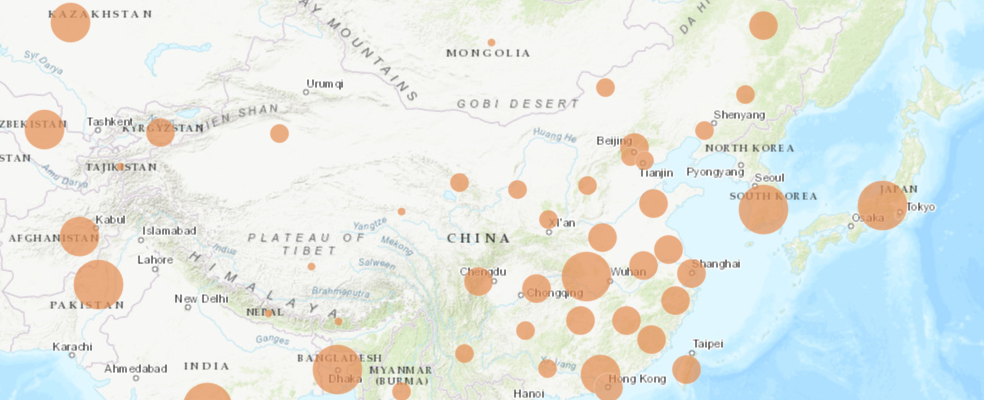

In [23]:
map1 = gis.map('China', zoomlevel=4)
map1

In [21]:
map1.add_layer(fl,   { "type": "FeatureLayer",
                       "renderer":"ClassedSizeRenderer",
                       "field_name":"Confirmed"})

#### Display as polygons


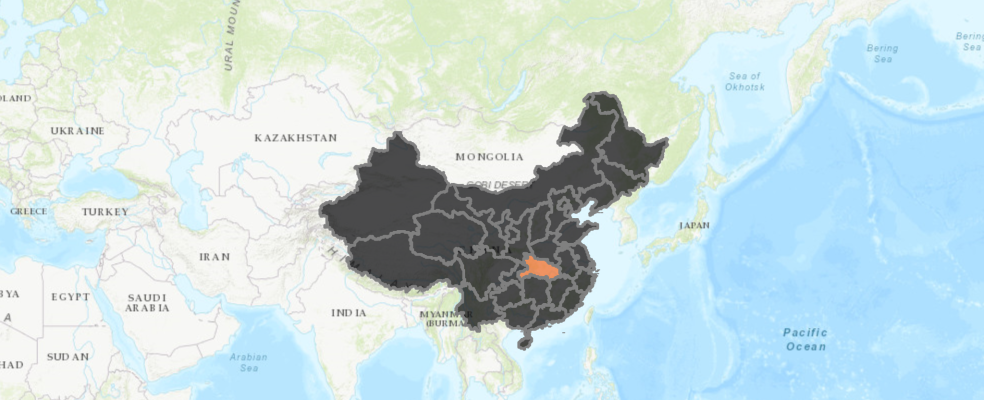

In [23]:
map1b = gis.map('China')
map1b

In [21]:
map1b.clear_graphics()
overlap_rows.spatial.plot(kind='map', map_widget=map1b,
                          renderer_type='c',  # for class breaks renderer
                          method='esriClassifyNaturalBreaks',  # classification algorithm
                          class_count=4,  # choose the number of classes
                          col='Confirmed',  # numeric column to classify
                          cmap='inferno',  # color map to pick colors from for each class
                          alpha=0.7  # specify opacity
                         )

True

In [22]:
map1b.zoom = 4
map1b.legend=True

The Map view above (`map1`) displays the number of confirmed cases per province in Mainland China. Orange polygons refer to provinces with number of confirmed cases in the range of [19754, 29631], and black polygons represent those in the range of [1, 9878].

### Map the deaths caused by COVID-19

#### Display as points

In [19]:
map2 = gis.map('China', zoomlevel=4)
map2

MapView(layout=Layout(height='400px', width='100%'))

In [20]:
map2.add_layer(fl,   { "type": "FeatureLayer",
                       "renderer":"ClassedSizeRenderer",
                       "field_name":"Deaths"})

#### Display as polygons


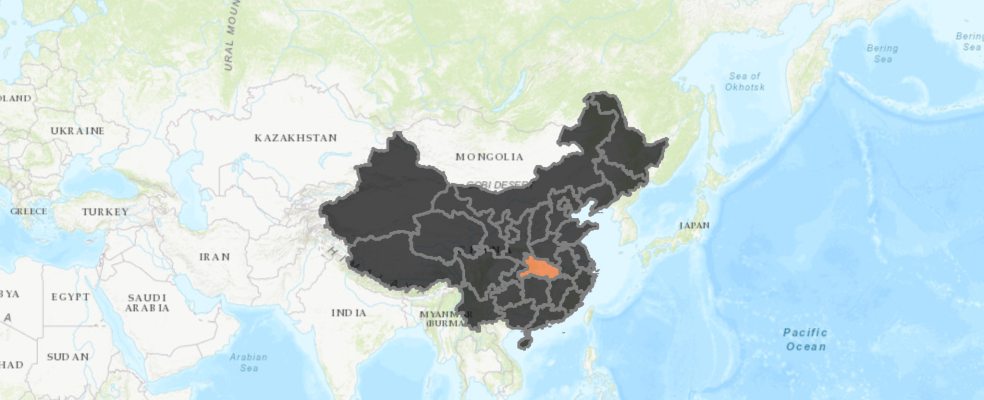

In [27]:
map2b = gis.map('China')
map2b

In [25]:
map2b.clear_graphics()
overlap_rows.spatial.plot(kind='map', map_widget=map2b,
                          renderer_type='c',  # for class breaks renderer
                          method='esriClassifyNaturalBreaks',  # classification algorithm
                          class_count=4,  # choose the number of classes
                          col='Deaths',  # numeric column to classify
                          cmap='inferno',  # color map to pick colors from for each class
                          alpha=0.7  # specify opacity
                         )

True

In [26]:
map2b.zoom = 4
map2b.legend = True

Using the same approach, we can then map the number of death cases per province in Mainland China. With legend displayed, `map2` shows us orange polygons refer to provinces with number of death cases in the range of [581, 871], and black polygons represent those in the range of [0, 290].

### Map the recovered COVID-19 cases

#### Display as points

In [21]:
map3 = gis.map('China', zoomlevel=4)
map3

MapView(layout=Layout(height='400px', width='100%'))

In [22]:
map3.add_layer(fl,   { "type": "FeatureLayer",
                       "renderer":"ClassedSizeRenderer",
                       "field_name":"Recovered"})

#### Display as polygons


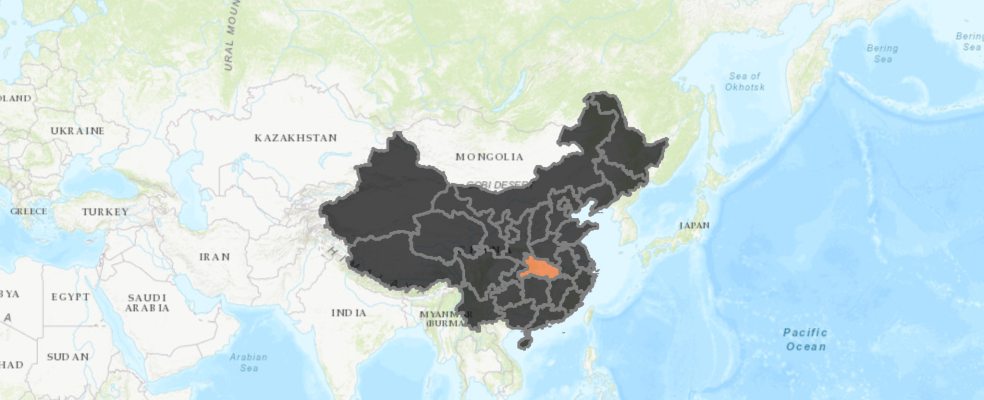

In [31]:
map3b = gis.map('China')
map3b

In [29]:
map3b.clear_graphics()
overlap_rows.spatial.plot(kind='map', map_widget=map3b,
                          renderer_type='c',  # for class breaks renderer
                          method='esriClassifyNaturalBreaks',  # classification algorithm
                          class_count=4,  # choose the number of classes
                          col='Recovered',  # numeric column to classify
                          cmap='inferno',  # color map to pick colors from for each class
                          alpha=0.7  # specify opacity
                         )

True

In [30]:
map3b.zoom = 4
map3b.legend = True

Same here in `map3`, with legend displayed, we can tell orange polygons refer to provinces with number of recovered cases in the range of [1197, 1795], and black polygons represent those in the range of [0, 598].

Based on the three maps plotted above, the Hubei province has topped all provinces in China no matter when we are looking at the confirmed cases, or the recovered/death tolls.

## 3. Map the COVID-19 cases In the U.S.

### Access feature service, and merge

We have now completed the mapping tasks of the 1st and 2nd situations listed in the previous section, it is time to map the 3rd situation - cities or counties outside of Mainland China with significant numbers of confirmed cases. Firstly, we need to access the feature service that contains geometry/shape info for all cities in the U. S., and merge with the COVID-19 DataFrame.

In [25]:
us_states_item = gis.content.get('99fd67933e754a1181cc755146be21ca')

In [26]:
us_states_flayer = us_states_item.layers[0]
us_states_fset = us_states_flayer.query()
us_states_fset.sdf.columns

Index(['FID', 'STATE_NAME', 'STATE_FIPS', 'SUB_REGION', 'STATE_ABBR',
       'POPULATION', 'POP_SQMI', 'POP2010', 'POP10_SQMI', 'WHITE', 'BLACK',
       'AMERI_ES', 'ASIAN', 'HAWN_PI', 'HISPANIC', 'OTHER', 'MULT_RACE',
       'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_9', 'AGE_10_14', 'AGE_15_19',
       'AGE_20_24', 'AGE_25_34', 'AGE_35_44', 'AGE_45_54', 'AGE_55_64',
       'AGE_65_74', 'AGE_75_84', 'AGE_85_UP', 'MED_AGE', 'MED_AGE_M',
       'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ', 'HSEHLD_1_M', 'HSEHLD_1_F',
       'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD', 'FHH_CHILD', 'FAMILIES',
       'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT', 'OWNER_OCC', 'RENTER_OCC',
       'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'AVE_SALE12', 'SQMI',
       'Shape__Area', 'Shape__Length', 'SHAPE'],
      dtype='object')

In [27]:
us_states_df = us_states_fset.sdf
us_states_df.head(3)

FID  STATE_NAME STATE_FIPS SUB_REGION STATE_ABBR  POPULATION  POP_SQMI  \
0    1      Alaska         02    Pacific         AK      744733       1.3   
1    2  California         06    Pacific         CA    39611295     250.5   
2    3      Hawaii         15    Pacific         HI     1461211     227.3   

    POP2010  POP10_SQMI     WHITE  ...  OWNER_OCC  RENTER_OCC  NO_FARMS12  \
0    710231         1.2    473576  ...     162765       95293         762   
1  37253956       235.6  21453934  ...    7035371     5542127       77857   
2   1360301       211.6    336599  ...     262682      192656        7000   

   AVE_SIZE12  CROP_ACR12  AVE_SALE12       SQMI   Shape__Area  Shape__Length  \
0        1094       84114       77329  581369.17  8.101401e+12   5.924954e+07   
1         328     9591783      547510  158144.83  6.479799e+11   5.237952e+06   
2         161      174042       94478    6429.38  1.888067e+10   1.370185e+06   

                                               SHAPE  
0  {"rings": [[[-17959594.8053098, 8122953.575198...  
1  {"rings": [[[-13543710.3257494, 4603367.827345...  
2  {"rings": [[[-17819334.303422, 2512026.7784964...  

[3 rows x 56 columns]

In [28]:
df2c = fset_usa.sdf[['Province_State', 'Confirmed', 'Recovered', 'Deaths']]
df2c = df2c.assign(STATE_NAME = df2c["Province_State"])
df2c.head()

Province_State  Confirmed  Recovered  Deaths      STATE_NAME
0     Mississippi       7212          0     281     Mississippi
1  Grand Princess        103          0       3  Grand Princess
2        Oklahoma       3748          0     230        Oklahoma
3        Delaware       4918          0     159        Delaware
4       Minnesota       5730          0     370       Minnesota

In [29]:
cols_4 = ['STATE_NAME','SHAPE']
overlap_rows4 = pd.merge(left = us_states_df[cols_4], right = df2c, how='inner',
                         on = 'STATE_NAME')
overlap_rows4.head(3)

STATE_NAME                                              SHAPE  \
0      Alaska  {'rings': [[[-17959594.8053098, 8122953.575198...   
1  California  {'rings': [[[-13543710.3257494, 4603367.827345...   
2      Hawaii  {'rings': [[[-17819334.303422, 2512026.7784964...   

  Province_State  Confirmed  Recovered  Deaths  
0         Alaska        364          0       9  
1     California      50794          0    2061  
2         Hawaii        618          0      16

### Map the confirmed COVID-19 cases in U. S.

As shown the merged DataFrame above, the COVID-19 entries have been linked with a SHAPE column, with which we can then plot in the Map widget directly.


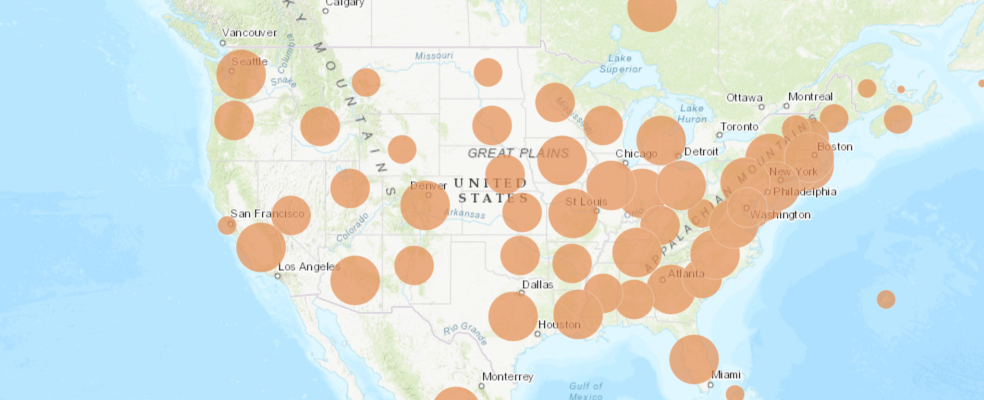

In [42]:
map4 = gis.map("US", zoomlevel=4)
map4

In [39]:
map4.add_layer(fl, { "type": "FeatureLayer",
                     "renderer":"ClassedSizeRenderer",
                     "field_name":"Confirmed"})


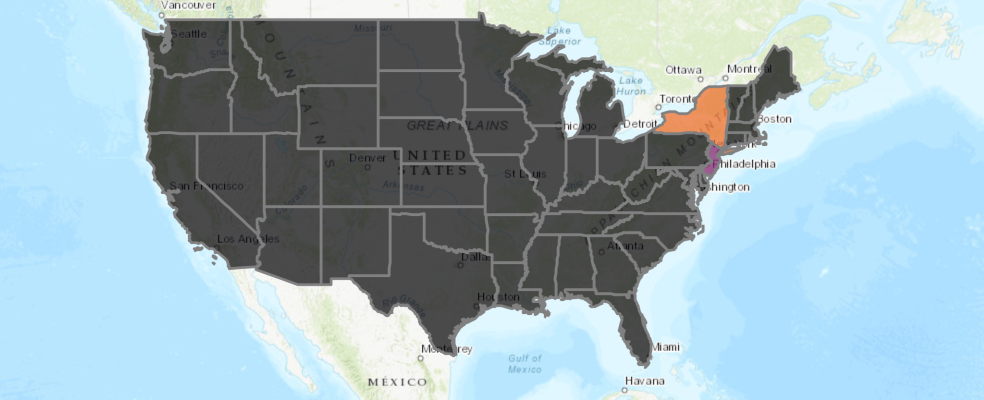

In [44]:
map4a = gis.map("US")
map4a

In [41]:
map4a.clear_graphics()
overlap_rows4.spatial.plot(kind='map', map_widget=map4a,
                           renderer_type='c',  # for class breaks renderer
                           class_count=4,  # choose the number of classes
                           method='esriClassifyEqualInterval',  # classification algorithm
                           col='Confirmed',  # numeric column to classify
                           cmap='inferno',  # color map to pick colors from for each class
                           alpha=0.7  # specify opacity
                          )

True

In [43]:
map4a.zoom = 4
map4a.legend = True

Unlike what are shown in previous maps, the 3rd situations are recorded per city/county, and will be mapped as points instead of polygons. Here, orange points represent cities with 2 confirmed cases, and black points indicate that there is 1 confirmed case in the city.

### Map the COVID-19 deaths in U. S.

As shown the merged DataFrame above, the COVID-19 entries have been linked with a SHAPE column, with which we can then plot in the Map widget directly.


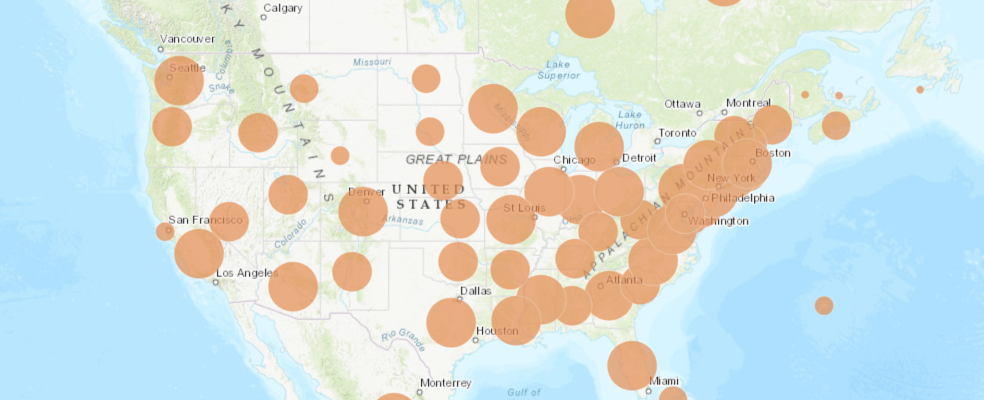

In [48]:
map4b = gis.map("US")
map4b

In [47]:
map4b.add_layer(fl, { "type": "FeatureLayer",
                     "renderer":"ClassedSizeRenderer",
                     "field_name":"Deaths"})


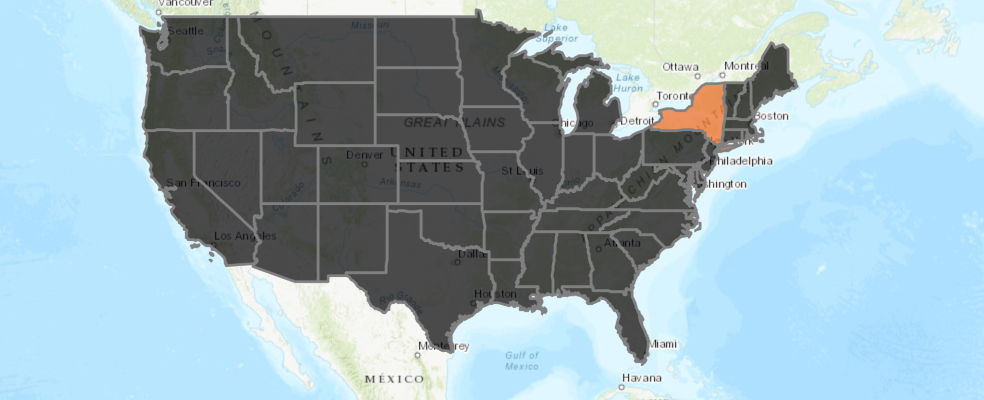

In [52]:
map4c = gis.map("US")
map4c

In [50]:
map4c.clear_graphics()
overlap_rows4.spatial.plot(kind='map', map_widget=map4c,
                           renderer_type='c',  # for class breaks renderer
                           class_count=4,  # choose the number of classes
                           method='esriClassifyEqualInterval',  # classification algorithm
                           col='Deaths',  # numeric column to classify
                           cmap='inferno',  # color map to pick colors from for each class
                           alpha=0.7  # specify opacity
                          )

True

In [51]:
map4c.zoom = 4
map4c.legend = True

## 4. Map the COVID-19 cases in other countries or regions

### Access Feature Service and merge

<Item title:"World Countries (Generalized)" type:Feature Layer Collection owner:esri_dm>
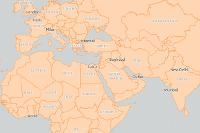

In [53]:
countries_item = gis.content.get('2b93b06dc0dc4e809d3c8db5cb96ba69')
countries_item

In [54]:
countries_flayer = countries_item.layers[0]
countries_fset = countries_flayer.query()
countries_fset.sdf['COUNTRY'].head()

0                          American Samoa
1    United States Minor Outlying Islands
2                            Cook Islands
3                        French Polynesia
4                                    Niue
Name: COUNTRY, dtype: object

Because merge() would require that there is a column or index level name to be found in both DataFrames for the operation to merge on, and we found that (as shown in `countries_fset.sdf.columns` and `df3.columns`) the `Country` column has different casing in the two DataFrames, `df3 = df3.assign(COUNTRY = df3["Country"])` is used to create a duplicate column but with matching casing.

In [55]:
countries_fset.sdf.columns

Index(['FID', 'COUNTRY', 'ISO', 'COUNTRYAFF', 'AFF_ISO', 'Shape__Area',
       'Shape__Length', 'SHAPE'],
      dtype='object')

In [56]:
merged1 = pd.merge(df_global_sum_c, countries_fset.sdf[['COUNTRY', 'SHAPE']], 
                   left_index=True, right_on='COUNTRY',
                   how="left")
merged1[['COUNTRY', 'Confirmed','Deaths', 'Recovered']].head(10)

COUNTRY  Confirmed  Deaths  Recovered
154.0       United States    1098565   64577     164015
247.0               Spain     213435   24543     112050
170.0               Italy     207428   28236      78249
89.0       United Kingdom     178684   27583        892
155.0              France     167303   24628      51124
160.0             Germany     163936    6708     126900
151.0              Turkey     122392    3258      53808
246.0  Russian Federation     114431    1169      13220
194.0                Iran      95646    6091      76318
20.0               Brazil      91589    6329      38039

### Map the confirmed COVID-19 cases in other countries or regions

Of the four administrative units splitting of the original data, now we have done with the 1st situation - "for Mainland China, number of cases are reported per province", and now let's go onto map the 2nd situation.
  2. for most of the regions and countries outside of Mainland China, number of cases are summarized per region/country (e.g. we are seeing Belgium as a country/region being reported here); 

When `mapb` is created centering Vietnam, the legend added along shows that orange polygons indicate that the countries are of number of confirmed cases ranging within (29, 43], pink polygons represent those ranging between (15, 29], and black polygons are for those ranging between [15, 15].


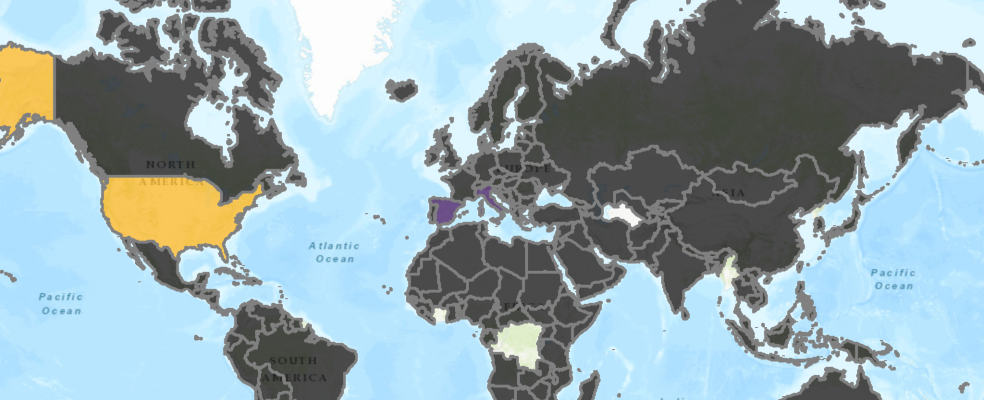

In [62]:
map5 = gis.map("Italy")
map5

In [61]:
merged1.spatial.plot(kind='map', map_widget=map5,
                     renderer_type='c',  # for class breaks renderer
                     method='esriClassifyStandardDeviation',  # classification algorithm
                     class_count=7,  # choose the number of classes
                     col='Confirmed',  # numeric column to classify
                     cmap='inferno',  # color map to pick colors from for each class
                     alpha=0.7  # specify opacity
                    )

True

In [60]:
map5.zoom = 4
map5.legend = True

## 5. What's next?

This notebook has walked us through steps in accessing the corona viruses statistics, tabularizing them in DataFrames, and finally mapping the outbreak in different regions or counties. The next chapter is to discuss how time-series analysis and charting can be done in ArcGIS API for Python, please stay with us.

## References

[1] https://www.cdc.gov/coronavirus/2019-ncov/about/index.html

[2] https://www.cdc.gov/coronavirus/2019-ncov/summary.html